In [ ]:
import os
import configparser

# Loading configurations
configParser = configparser.RawConfigParser()   
configFilePath = r'configuration.txt'
configParser.read(configFilePath)

insert_amd_env_vars =  int(configParser.get('COMMON', 'insert_amd_env_vars'))
HSA_OVERRIDE_GFX_VERSION =  configParser.get('COMMON', 'HSA_OVERRIDE_GFX_VERSION')
ROCM_PATH =  configParser.get('COMMON', 'ROCM_PATH')

if(insert_amd_env_vars != 0):
    os.environ["HSA_OVERRIDE_GFX_VERSION"] = HSA_OVERRIDE_GFX_VERSION
    os.environ["ROCM_PATH"] = ROCM_PATH
    
#import os
#os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"
#os.environ["AUTOGRAPH_VERBOSITY"] = "0"

In [ ]:

import configparser

# Loading configurations
configParser = configparser.RawConfigParser()   
configFilePath = r'configuration.txt'
configParser.read(configFilePath)


datasetPathGeneratedFaces =  configParser.get('evaluate_imagen', 'test_datasetPathGeneratedFaces')
generated_face_table_name =  configParser.get('evaluate_imagen', 'generated_face_table_name')
evaluation_results_folder = configParser.get('evaluate_imagen', 'evaluation_results_folder')
datasetPathFaces =  configParser.get('evaluate_imagen', 'test_datasetpathfaces')

datasetPathGeneratedFaces_pooled =  configParser.get('evaluate_imagen', 'test_datasetpathgeneratedfaces_pooled')
datasetPathFaces_pooled =  configParser.get('evaluate_imagen', 'test_datasetpathfaces_pooled')

datasetPathDatabase =  configParser.get('COMMON', 'test_datasetPathDatabase') + '/dataset.db'


cuda =  int(configParser.get('COMMON', 'cuda'))
cpus =  int(configParser.get('COMMON', 'cpus'))




In [ ]:
#TODO document jupyter
import pickle
import sqlite3 as sl
import pandas as pd
import numpy as np
from PIL import Image

from textwrap import wrap
import os


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd



In [ ]:
pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None


In [ ]:
image_size =  int(configParser.get('COMMON', 'resizeImageTo'))
audio_length_used =  configParser.get('evaluate_imagen', 'audio_length_used') 
model_filename =  configParser.get('evaluate_imagen', 'model_filename') + '_'  + audio_length_used +  's.pt'
openl3_mode =  configParser.get('evaluate_imagen', 'openl3_mode')

In [ ]:
import lancedb
uri = datasetPathDatabase
db = lancedb.connect(uri)

table_generated = db.open_table(generated_face_table_name).to_pandas()
#table_generated = table_generated.loc[table_generated.index.repeat(5)].reset_index(drop=True)
table_generated


In [ ]:
import multiprocessing
try:
    multiprocessing.set_start_method('spawn')
except:
    print("")

In [ ]:
audio_folder = output_folder = r'imagen_testing_folder' 
if not os.path.exists(audio_folder):
    os.makedirs(audio_folder)

In [ ]:
from testing_imagen_face import extract_face_attr_and_rep
table_generated['face_path'] = table_generated['generated_face_path']
proc = multiprocessing.Process(target=extract_face_attr_and_rep, args=(table_generated,output_folder,))
proc.start()
proc.join()

In [ ]:
with open(output_folder + '/' + 'df_data_100.pickle', 'rb') as handle:
    table_generated = pickle.load(handle)
table_generated = table_generated.drop('face_path', axis=1)
table_generated

In [40]:
import shutil
import sys
import time


try:
    db.drop_table('matches')
except:
    pass

i = 0
len_gen_tbl = len(table_generated)
for index, row in table_generated.iterrows():


    face_file = row['generated_face_path']
    user = row['user']
    id_true= int(row['id_true'])
    face_rep = row['face_rep']
    gender = row['gender']
    ethnicity = row['ethnicity']
    age = int(row['age'])


    tbl = db.open_table("video_stage1")
    result = tbl.search().limit(10).to_df()

    match_1 = result.iloc[0]['user']
    match_2 = result.iloc[1]['user']
    match_3 = result.iloc[2]['user']
    match_4 = result.iloc[3]['user']
    match_5 = result.iloc[4]['user']
    match_6 = result.iloc[5]['user']
    match_7 = result.iloc[6]['user']
    match_8 = result.iloc[7]['user']
    match_9 = result.iloc[8]['user']
    match_10= result.iloc[9]['user']

    
    

    df_table = pd.DataFrame()
    df_table = df_table.append({'id': i , 'id_true':id_true,
                    'generated_face_path': face_file,'user':user,'age':age,'gender':gender,'ethnicity':ethnicity,
                    'match_1':match_1,'match_2':match_2,'match_3':match_3,'match_4':match_4,'match_5':match_5,
                    'match_6':match_6,'match_7':match_7,'match_8':match_8,'match_9':match_9,'match_10':match_10,
        'vector' : face_rep,'stage': 1}, ignore_index=True)
    


    try:
        matches_tbl.add(df_table)
    except:
        matches_tbl = db.create_table('matches', df_table)

    i = i + 1
    sys.stdout.write("\r%d%%" % int(i/len_gen_tbl * 100) )
    sys.stdout.flush()




100%

In [142]:
matches_pd = matches_tbl.to_pandas()
matches_pd

,id,id_true,generated_face_path,user,age,gender,ethnicity,match_1,match_2,match_3,match_4,match_5,match_6,match_7,match_8,match_9,match_10,vector,stage
0,0,0,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00001,36,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013335603, 0.005049591, 0.017582245, 0.0352...",1
1,1,1,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00002,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013470241, 0.0057366346, 0.014831804, 0.035...",1
2,2,2,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,31,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.012221896, 0.006034469, 0.014452214, 0.0333...",1
3,3,3,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,34,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.009061436, 0.0064689512, 0.013366315, 0.029...",1
4,4,4,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00004,40,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.014386003, 0.0011478607, 0.017817777, 0.035...",1
5,5,5,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00005,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013160626, 0.004580143, 0.018079957, 0.0326...",1
6,6,6,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00006,31,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013035529, 0.0073853782, 0.01861618, 0.0313...",1
7,7,7,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00007,35,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013781644, 0.0037778313, 0.020164667, 0.031...",1
8,8,8,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00008,32,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.0111045325, 0.0043452103, 0.012811832, 0.02...",1
9,9,9,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00009,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.01346768, 0.005803336, 0.016878689, 0.03449...",1


In [143]:
ptable_unique_users = matches_pd.drop_duplicates(subset=['user'], keep='first')
unique_users = ptable_unique_users['user'].to_numpy()
unique_users

array(['id00001', 'id00002', 'id00003', 'id00004', 'id00005', 'id00006',
       'id00007', 'id00008', 'id00009', 'id00010'], dtype=object)

In [144]:
pd_generated = db.open_table('matches').to_pandas()
pd_generated

,id,id_true,generated_face_path,user,age,gender,ethnicity,match_1,match_2,match_3,match_4,match_5,match_6,match_7,match_8,match_9,match_10,vector,stage
0,0,0,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00001,36,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013335603, 0.005049591, 0.017582245, 0.0352...",1
1,1,1,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00002,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013470241, 0.0057366346, 0.014831804, 0.035...",1
2,2,2,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,31,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.012221896, 0.006034469, 0.014452214, 0.0333...",1
3,3,3,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,34,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.009061436, 0.0064689512, 0.013366315, 0.029...",1
4,4,4,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00004,40,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.014386003, 0.0011478607, 0.017817777, 0.035...",1
5,5,5,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00005,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013160626, 0.004580143, 0.018079957, 0.0326...",1
6,6,6,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00006,31,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013035529, 0.0073853782, 0.01861618, 0.0313...",1
7,7,7,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00007,35,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013781644, 0.0037778313, 0.020164667, 0.031...",1
8,8,8,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00008,32,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.0111045325, 0.0043452103, 0.012811832, 0.02...",1
9,9,9,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00009,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.01346768, 0.005803336, 0.016878689, 0.03449...",1


In [145]:
pd_truth = db.open_table("video_stage1").to_pandas()
pd_truth

,id,video_path,face_path,user,blurred_face_path,features_path,age,gender,ethnicity,vector,stage
0,0,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00001,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,37.0,Man,asian,"[0.008719929, 0.00391743, 0.005621904, 0.01561...",1
1,1,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00002,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,33.0,Man,black,"[0.034821488, 0.011017442, 0.012458151, 0.0310...",1
2,2,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00003,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,28.0,Man,white,"[0.020591458, 0.009568957, 0.0065427506, 0.015...",1
3,3,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00003,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,26.0,Man,white,"[0.022685481, 0.014688694, 0.0077175363, 0.015...",1
4,4,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00004,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,24.0,Man,black,"[0.020744538, 0.02151983, 0.0071302326, 0.0234...",1
5,5,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00005,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,27.0,Man,white,"[0.011789978, 0.005180944, -0.0041359775, 0.01...",1
6,6,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00006,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,29.0,Woman,asian,"[0.002584092, 0.007880463, 0.014118768, 0.0104...",1
7,7,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00007,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,26.0,Man,black,"[0.017048048, 0.021359792, 0.017510023, 0.0192...",1
8,8,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00008,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,30.0,Man,white,"[0.018406654, 0.016798086, 0.018519454, 0.0229...",1
9,9,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00009,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,27.0,Woman,white,"[0.0032445402, 0.006399524, 0.006689785, 0.020...",1


In [211]:
f= open(evaluation_results_folder + "/results.txt","w+")
f.write("No. of generated faces: " + str(len(table_generated)) + "\n")
f.write("No. of unique users: " + str(len(ptable_unique_users)) + "\n")
f.flush()

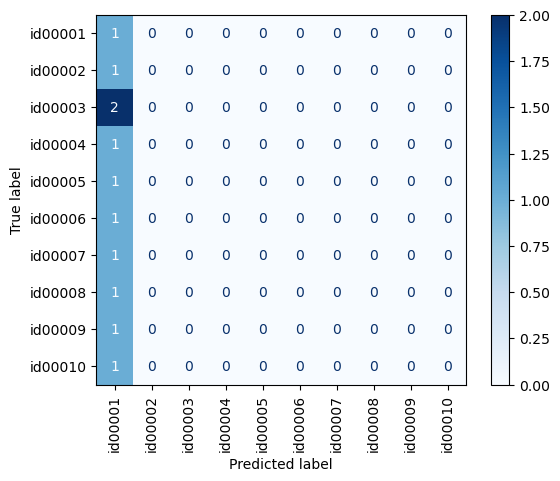

In [147]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score

display_labels = unique_users
cm = confusion_matrix(pd_generated['user'],pd_generated['match_1'],labels=display_labels)
prfs = precision_recall_fscore_support(pd_generated['user'], pd_generated['match_1'], average='micro',labels=display_labels)
acc = accuracy_score(pd_generated['user'], pd_generated['match_1'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels,)
disp.plot(cmap="Blues",xticks_rotation=90)
disp.figure_.savefig(evaluation_results_folder + "/face_recog_1.png",dpi=300,)

f.write("\n" + "Face Recognition while considering the first 1 match:" + "\n")
f.write("Accuracy: " + str(acc) + "\n")
f.write("Precision: " + str(prfs[0]) + "\n")
f.write("Recall: " + str(prfs[1]) + "\n")
f.write("F1-score: " + str(prfs[2]) + "\n")
f.flush()

In [148]:
from collections import Counter

def Most_Common(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0]

def face_recog_first_n_matches(row,n):
    #print(n == 3)

    user = row['user']
    match_1 = row['match_1']
    match_2 = row['match_2']
    match_3 = row['match_3']
    match_4 = row['match_4']
    match_5 = row['match_5']
    match_6 = row['match_6']
    match_7 = row['match_7']
    match_8 = row['match_8']
    match_9 = row['match_9']
    match_10 = row['match_10']
    if(n==3):
        if(user == match_1 or user == match_2 or user == match_3):
            row['match_n_3'] = user
        else:
            lst = [match_1,match_2,match_3]
            row['match_n_3'] = Most_Common(lst)
    elif(n==5):
        if(user == match_1 or user == match_2 or user == match_3 or user == match_4 or user == match_5):
            row['match_n_5'] = user
        else:
            lst = [match_1,match_2,match_3,match_4,match_5]
            row['match_n_5'] = Most_Common(lst)
    elif(n==10):
        if(user == match_1 or user == match_2 or user == match_3 or user == match_4 or user == match_5 or
           user == match_6 or user == match_7 or user == match_8 or user == match_9 or user == match_10):
            row['match_n_10'] = user
        else:
            lst = [match_1,match_2,match_3,match_4,match_5,match_6,match_7,match_8,match_9,match_10]
            row['match_n_10'] = Most_Common(lst)
    else:
        raise Exception("n can only be 3,5 or 10") 
    
    #print(row)
    return row

In [149]:
pd_generated = db.open_table('matches').to_pandas()
pd_generated = pd_generated.apply(face_recog_first_n_matches,args=(3,),axis=1)
pd_generated = pd_generated.apply(face_recog_first_n_matches,args=(5,),axis=1)
pd_generated = pd_generated.apply(face_recog_first_n_matches,args=(10,),axis=1)
pd_generated

,id,id_true,generated_face_path,user,age,gender,ethnicity,match_1,match_2,match_3,match_4,match_5,match_6,match_7,match_8,match_9,match_10,vector,stage,match_n_3,match_n_5,match_n_10
0,0,0,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00001,36,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013335603, 0.005049591, 0.017582245, 0.0352...",1,id00001,id00001,id00001
1,1,1,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00002,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013470241, 0.0057366346, 0.014831804, 0.035...",1,id00002,id00002,id00002
2,2,2,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,31,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.012221896, 0.006034469, 0.014452214, 0.0333...",1,id00003,id00003,id00003
3,3,3,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,34,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.009061436, 0.0064689512, 0.013366315, 0.029...",1,id00003,id00003,id00003
4,4,4,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00004,40,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.014386003, 0.0011478607, 0.017817777, 0.035...",1,id00001,id00004,id00004
5,5,5,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00005,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013160626, 0.004580143, 0.018079957, 0.0326...",1,id00001,id00003,id00005
6,6,6,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00006,31,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013035529, 0.0073853782, 0.01861618, 0.0313...",1,id00001,id00003,id00006
7,7,7,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00007,35,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013781644, 0.0037778313, 0.020164667, 0.031...",1,id00001,id00003,id00007
8,8,8,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00008,32,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.0111045325, 0.0043452103, 0.012811832, 0.02...",1,id00001,id00003,id00008
9,9,9,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00009,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.01346768, 0.005803336, 0.016878689, 0.03449...",1,id00001,id00003,id00009


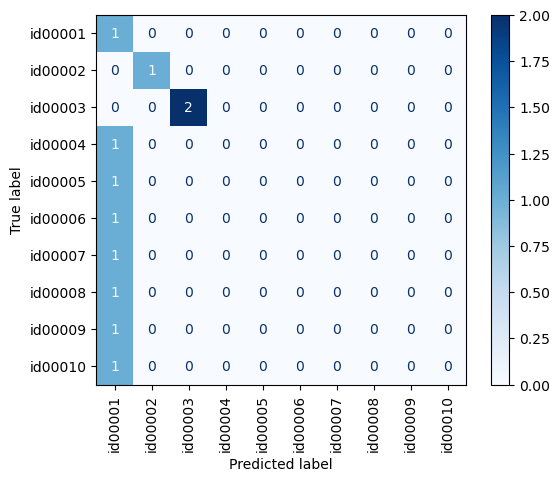

In [150]:

display_labels = unique_users
cm = confusion_matrix(pd_generated['user'],pd_generated['match_n_3'],labels=display_labels)
prfs = precision_recall_fscore_support(pd_generated['user'], pd_generated['match_n_3'], average='micro',labels=display_labels)
acc = accuracy_score(pd_generated['user'], pd_generated['match_n_3'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels,)
disp.plot(cmap="Blues",xticks_rotation=90)
disp.figure_.savefig(evaluation_results_folder + "/face_recog_3.png",dpi=300,)

f.write("\n" + "Face Recognition while considering the first 3 matches:" + "\n")
f.write("Accuracy: " + str(acc) + "\n")
f.write("Precision: " + str(prfs[0]) + "\n")
f.write("Recall: " + str(prfs[1]) + "\n")
f.write("F1-score: " + str(prfs[2]) + "\n")
f.flush()

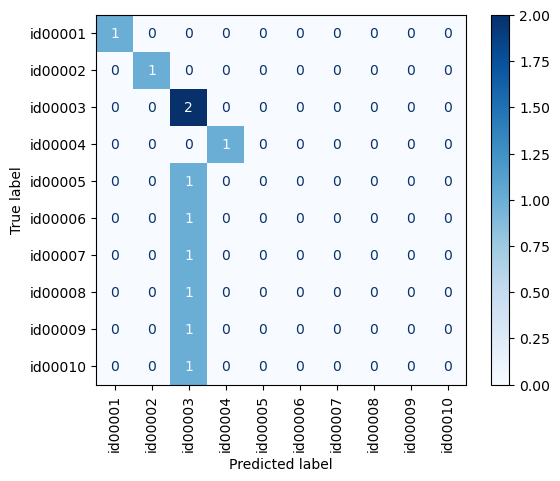

In [151]:

display_labels = unique_users
cm = confusion_matrix(pd_generated['user'],pd_generated['match_n_5'],labels=display_labels)
prfs = precision_recall_fscore_support(pd_generated['user'], pd_generated['match_n_5'], average='micro',labels=display_labels)
acc = accuracy_score(pd_generated['user'], pd_generated['match_n_5'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels,)
disp.plot(cmap="Blues",xticks_rotation=90)
disp.figure_.savefig(evaluation_results_folder + "/face_recog_5.png",dpi=300,)

f.write("\n" + "Face Recognition while considering the first 5 matches:" + "\n")
f.write("Accuracy: " + str(acc) + "\n")
f.write("Precision: " + str(prfs[0]) + "\n")
f.write("Recall: " + str(prfs[1]) + "\n")
f.write("F1-score: " + str(prfs[2]) + "\n")
f.flush()

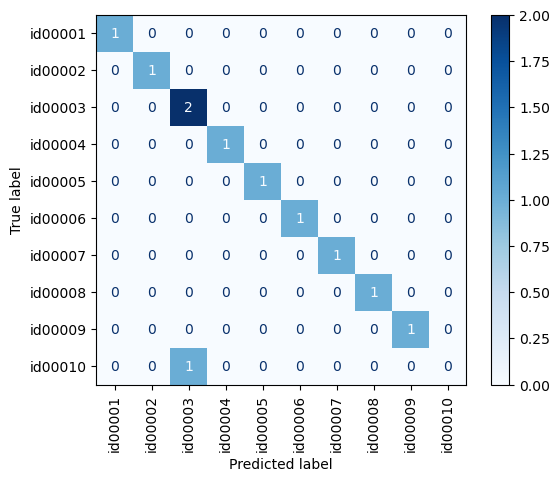

In [152]:

display_labels = unique_users
cm = confusion_matrix(pd_generated['user'],pd_generated['match_n_10'],labels=display_labels)
prfs = precision_recall_fscore_support(pd_generated['user'], pd_generated['match_n_10'], average='micro',labels=display_labels)
acc = accuracy_score(pd_generated['user'], pd_generated['match_n_10'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels,)
disp.plot(cmap="Blues",xticks_rotation=90)
disp.figure_.savefig(evaluation_results_folder + "/face_recog_10.png",dpi=300,)

f.write("\n" + "Face Recognition while considering the first 10 matches:" + "\n")
f.write("Accuracy: " + str(acc) + "\n")
f.write("Precision: " + str(prfs[0]) + "\n")
f.write("Recall: " + str(prfs[1]) + "\n")
f.write("F1-score: " + str(prfs[2]) + "\n")
f.flush()

In [153]:
pd_joined = pd.merge(pd_generated, pd_truth, left_on="id_true",right_on="id",suffixes=("_gen", "_true"))
pd_joined

,id_gen,id_true,generated_face_path,user_gen,age_gen,gender_gen,ethnicity_gen,match_1,match_2,match_3,match_4,match_5,match_6,match_7,match_8,match_9,match_10,vector_gen,stage_gen,match_n_3,match_n_5,match_n_10,id_true,video_path,face_path,user_true,blurred_face_path,features_path,age_true,gender_true,ethnicity_true,vector_true,stage_true
0,0,0,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00001,36,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013335603, 0.005049591, 0.017582245, 0.0352...",1,id00001,id00001,id00001,0,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00001,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,37.0,Man,asian,"[0.008719929, 0.00391743, 0.005621904, 0.01561...",1
1,1,1,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00002,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013470241, 0.0057366346, 0.014831804, 0.035...",1,id00002,id00002,id00002,1,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00002,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,33.0,Man,black,"[0.034821488, 0.011017442, 0.012458151, 0.0310...",1
2,2,2,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,31,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.012221896, 0.006034469, 0.014452214, 0.0333...",1,id00003,id00003,id00003,2,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00003,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,28.0,Man,white,"[0.020591458, 0.009568957, 0.0065427506, 0.015...",1
3,3,3,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,34,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.009061436, 0.0064689512, 0.013366315, 0.029...",1,id00003,id00003,id00003,3,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00003,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,26.0,Man,white,"[0.022685481, 0.014688694, 0.0077175363, 0.015...",1
4,4,4,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00004,40,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.014386003, 0.0011478607, 0.017817777, 0.035...",1,id00001,id00004,id00004,4,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00004,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,24.0,Man,black,"[0.020744538, 0.02151983, 0.0071302326, 0.0234...",1
5,5,5,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00005,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013160626, 0.004580143, 0.018079957, 0.0326...",1,id00001,id00003,id00005,5,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00005,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,27.0,Man,white,"[0.011789978, 0.005180944, -0.0041359775, 0.01...",1
6,6,6,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00006,31,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013035529, 0.0073853782, 0.01861618, 0.0313...",1,id00001,id00003,id00006,6,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00006,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,29.0,Woman,asian,"[0.002584092, 0.007880463, 0.014118768, 0.0104...",1
7,7,7,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id0

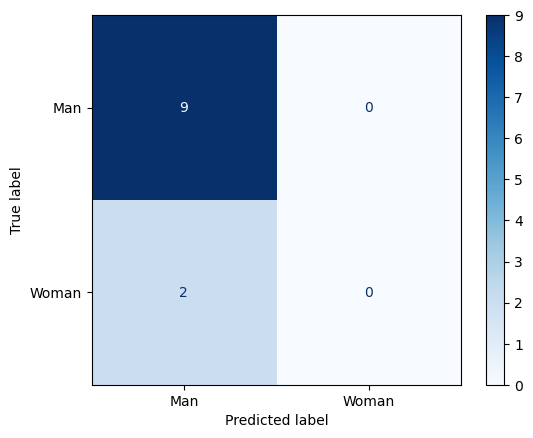

In [161]:
display_labels = pd_joined.drop_duplicates(subset=['gender_true'], keep='first')['gender_true']
cm = confusion_matrix(pd_joined['gender_true'], pd_joined['gender_gen'],labels=display_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels,)
disp.plot(cmap="Blues")
disp.figure_.savefig(evaluation_results_folder + "/gender_cm.png",dpi=300)

prfs = precision_recall_fscore_support(pd_joined['gender_true'], pd_joined['gender_gen'], average='micro',labels=display_labels)
acc = accuracy_score(pd_joined['gender_true'], pd_joined['gender_gen'])
f.write("\n" + "Gender:" + "\n")
f.write("Accuracy: " + str(acc) + "\n")
f.write("Precision: " + str(prfs[0]) + "\n")
f.write("Recall: " + str(prfs[1]) + "\n")
f.write("F1-score: " + str(prfs[2]) + "\n")
f.flush()

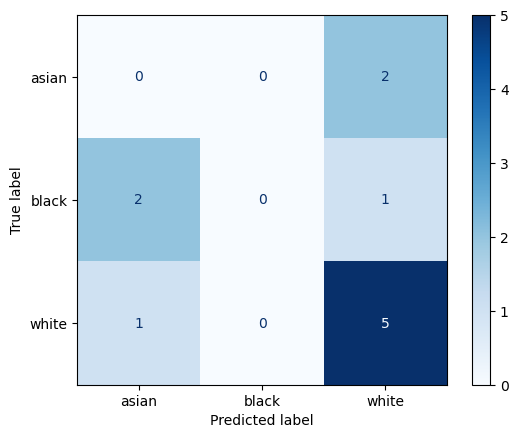

In [162]:
display_labels = pd_joined.drop_duplicates(subset=['ethnicity_true'], keep='first')['ethnicity_true']
cm = confusion_matrix(pd_joined['ethnicity_true'], pd_joined['ethnicity_gen'],labels=display_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels,)
disp.plot(cmap="Blues")
disp.figure_.savefig(evaluation_results_folder + "/ethnicity_cm.png",dpi=300)

prfs = precision_recall_fscore_support(pd_joined['ethnicity_true'], pd_joined['ethnicity_gen'], average='micro',labels=display_labels)
acc = accuracy_score(pd_joined['ethnicity_true'], pd_joined['ethnicity_gen'])
f.write("\n" + "Ethnicity:" + "\n")
f.write("Accuracy: " + str(acc) + "\n")
f.write("Precision: " + str(prfs[0]) + "\n")
f.write("Recall: " + str(prfs[1]) + "\n")
f.write("F1-score: " + str(prfs[2]) + "\n")
f.flush()

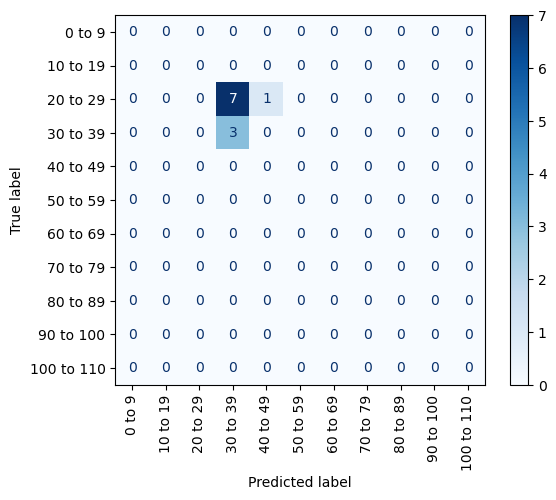

In [194]:
age_bins= [0,10,20,30,40,50,60,70,80,90,100,110]
labels = ['0 to 9','10 to 19','20 to 29','30 to 39','40 to 49','50 to 59', '60 to 69', '70 to 79', '80 to 89', '90 to 100','100 to 110']
pd_joined['age_group_gen'] = pd.cut(pd_joined['age_gen'], bins=age_bins, labels=labels, right=False)
pd_joined['age_group_true'] = pd.cut(pd_joined['age_true'], bins=age_bins, labels=labels, right=False)


display_labels = labels
cm = confusion_matrix(pd_joined['age_group_true'], pd_joined['age_group_gen'],labels=display_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=display_labels,)
disp.plot(cmap="Blues",xticks_rotation=90)
disp.figure_.savefig(evaluation_results_folder + "/ethnicity_cm.png",dpi=300)

prfs = precision_recall_fscore_support(pd_joined['age_group_true'], pd_joined['age_group_gen'], average='micro',labels=display_labels)
acc = accuracy_score(pd_joined['age_group_true'], pd_joined['age_group_gen'])
f.write("\n" + "Age Group:" + "\n")
f.write("Accuracy: " + str(acc) + "\n")
f.write("Precision: " + str(prfs[0]) + "\n")
f.write("Recall: " + str(prfs[1]) + "\n")
f.write("F1-score: " + str(prfs[2]) + "\n")
f.flush()

In [196]:
from math import sqrt
age_true = pd_joined['age_true'].to_numpy()
age_generated = pd_joined['age_gen'].to_numpy()
age_rmse = sqrt(((age_true - age_generated)**2).mean(axis = 0))
f.write('rmse of age: ' + str(age_rmse) + " years\n")
f.flush()

In [197]:
pd_joined

,id_gen,id_true,generated_face_path,user_gen,age_gen,gender_gen,ethnicity_gen,match_1,match_2,match_3,match_4,match_5,match_6,match_7,match_8,match_9,match_10,vector_gen,stage_gen,match_n_3,match_n_5,match_n_10,id_true,video_path,face_path,user_true,blurred_face_path,features_path,age_true,gender_true,ethnicity_true,vector_true,stage_true,age_group_gen,age_group_true
0,0,0,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00001,36,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013335603, 0.005049591, 0.017582245, 0.0352...",1,id00001,id00001,id00001,0,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00001,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,37.0,Man,asian,"[0.008719929, 0.00391743, 0.005621904, 0.01561...",1,30 to 39,30 to 39
1,1,1,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00002,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013470241, 0.0057366346, 0.014831804, 0.035...",1,id00002,id00002,id00002,1,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00002,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,33.0,Man,black,"[0.034821488, 0.011017442, 0.012458151, 0.0310...",1,30 to 39,30 to 39
2,2,2,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,31,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.012221896, 0.006034469, 0.014452214, 0.0333...",1,id00003,id00003,id00003,2,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00003,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,28.0,Man,white,"[0.020591458, 0.009568957, 0.0065427506, 0.015...",1,30 to 39,20 to 29
3,3,3,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00003,34,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.009061436, 0.0064689512, 0.013366315, 0.029...",1,id00003,id00003,id00003,3,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00003,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,26.0,Man,white,"[0.022685481, 0.014688694, 0.0077175363, 0.015...",1,30 to 39,20 to 29
4,4,4,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00004,40,Man,asian,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.014386003, 0.0011478607, 0.017817777, 0.035...",1,id00001,id00004,id00004,4,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00004,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,24.0,Man,black,"[0.020744538, 0.02151983, 0.0071302326, 0.0234...",1,40 to 49,20 to 29
5,5,5,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00005,33,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013160626, 0.004580143, 0.018079957, 0.0326...",1,id00001,id00003,id00005,5,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00005,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesTest...,27.0,Man,white,"[0.011789978, 0.005180944, -0.0041359775, 0.01...",1,30 to 39,20 to 29
6,6,6,/home/gamal/Datasets/Dataset1Test/GeneratedFac...,id00006,31,Man,white,id00001,id00002,id00003,id00003,id00004,id00005,id00006,id00007,id00008,id00009,"[0.013035529, 0.0073853782, 0.01861618, 0.0313...",1,id00001,id00003,id00006,6,/home/gamal/Datasets/Dataset1Test/VideoTest/id...,/home/gamal/Datasets/Dataset1Test/FacesTest/id...,id00006,/home/gamal/Datasets/Dataset1Test/GuidesTest/i...,/home/gamal/Datasets/Dataset1Test/FeaturesT

In [210]:
def process_image_path(path):
    
    image = Image.open(path).convert('RGB')

    w_s = image_size / (1+2 * 0.4)
    h_s = image_size / (1+2 * 0.4)

    #print(image.size)
    image = image.crop((0.2*w_s,0.0*h_s,1.6*w_s,1.4*h_s))
    image = image.resize((image_size,image_size))

    #print('saving')
    #image.save(str(random.random()) + '.png')
    return image


In [212]:
import cv2
from skimage.metrics import structural_similarity as calc_ssim
from skimage.metrics import mean_squared_error
psnr = []
ssim = []
mse = []
for index, row in pd_joined.iterrows():
    im_true = process_image_path(row['face_path'])
    im_true = cv2.cvtColor(np.array(im_true), cv2.COLOR_RGB2BGR)
    
    im_generated = cv2.imread(row['generated_face_path'])
    psnr.append(cv2.PSNR(im_true, im_generated))
    #print(im_true.shape)
    ssim.append(calc_ssim(im_true,im_generated,channel_axis=2))

    mse.append(mean_squared_error(im_true,im_generated))
    
f.write('\nAverage PSNR is: ' + str(np.array(psnr).mean()) + "\n")
f.write('Average SSIM is: ' + str(np.array(ssim).mean()) + "\n")
f.write('Average  MSE is: ' + str(np.array(mse).mean()) + "\n")
f.flush()

    

In [ ]:
#https://pypi.org/project/pytorch-fid-wrapper/
#https://github.com/mseitzer/pytorch-fid

import  pytorch_fid_wrapper as pfw
import torchvision.datasets as datasets

data = datasets.ImageFolder(datasetPathGeneratedFaces)





In [241]:
fid = ! python -m pytorch_fid {datasetPathFaces} {datasetPathGeneratedFaces}

In [242]:
fid

['/bin/bash: /home/gamal/anaconda3/envs/ds2f_pre/lib/python3.8/site-packages/cv2/../../../../lib/libtinfo.so.6: no version information available (required by /bin/bash)',
 'Warning: batch size is bigger than the data size. Setting batch size to data size',
 '',
 '100%|██████████| 1/1 [00:00<00:00,  2.82it/s]',
 'Warning: batch size is bigger than the data size. Setting batch size to data size',
 '',
 '100%|██████████| 1/1 [00:00<00:00,  6.43it/s]',
 'FID:  373.545827876444']

In [240]:
fid_value = [s for s in fid if "FID:" in s]
f.write(str(fid_value[0]) + "\n")
f.flush()

In [ ]:
f.close()

In [243]:
import shutil

shutil.copyfile('configuration.txt',evaluation_results_folder + "/configuration.txt" )

'/home/gamal/Datasets/Dataset1Test/configuration.txt'